In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
warnings.filterwarnings("ignore")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from itertools import chain
from nltk import FreqDist

In [6]:
review_data = pd.read_csv("review_chinsese_philadelphia.csv")

# removing the duplicates
review_data.drop_duplicates(subset=['review_id','date','user_id'],inplace=True) 
review_data.set_index('Unnamed: 0')

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
Unnamed: 0,,,,,,,,,
1,L0E_Ld__jIATsQ1vA7ZGZw,Cvi8nZTwDVaQkqmmgQwQMw,D4DZztR7vkbiED6txGUYFg,4,0,0,1,Looks like there is a second Red Kings restaur...,2013-06-24 13:15:21
2,Vou3XAgjYJBuCO_-h1OQaA,M-00xuAOYLeaGEhPmmKjfg,eaDZlSuVS0EY67Ke6pRP6Q,5,0,0,0,Absolutely wonderful food & service! Go there ...,2011-04-23 00:52:05
3,hozoa1DsTCjpz4UC8YGsNw,ndgHYecgAWEqtjnjE7LtfA,MMRRS6YhVRx_iN5-JhMRYg,4,0,0,0,The new Han Dynasty took over the spot where t...,2012-10-08 15:29:44
4,tfucaiy6lG5UbvbmTD4STg,wABHp4fGUC-0acRKhmQO2A,MMRRS6YhVRx_iN5-JhMRYg,5,0,0,0,"Awesome food, great place to split a bunch of ...",2016-03-07 00:22:02
5,bu0BUkenT8c8nnyKUaF0-A,qmpRRF4HAKuGJEujoK-IdQ,eaDZlSuVS0EY67Ke6pRP6Q,5,0,0,0,"I've been coming to this place for years now, ...",2016-02-24 14:34:27
...,...,...,...,...,...,...,...,...,...
56943,fb_xKUoJb-A2wWTSmFndfg,pGmbV55YLG54t8r1W4F3xg,-1B9pP_CrRBJYPICE5WbRA,5,1,0,1,Spice 28 is a great happy hour option in the h...,2021-11-08 15:15:45
56944,4yFZtkdc7SPueWozB6zmwQ,ttg9bK1FuUDZQNIleuR-KQ,ytynqOUb3hjKeJfRj5Tshw,5,0,1,0,"If it wasn't for my friend dragging me out, I ...",2019-12-21 18:46:06
56945,d_POWSXOV2S7QSO6SOfCNg,I2owOyPHlcXYfhXr8hvodw,-1B9pP_CrRBJYPICE5WbRA,3,0,0,1,"So, myself and my person decided to try someth...",2015-10-29 00:58:39


### Sentiment Score

In [17]:
# quantify the review column to sentiment value
sid = SentimentIntensityAnalyzer()
def sentiquantify(sen):
    score = sid.polarity_scores(sen)
    score = score['compound']
    return score


In [18]:
review_data['sentiment_score'] = review_data['text'].apply(sentiquantify)

In [19]:
review_data['sentiment'] = review_data['sentiment_score'].apply(lambda x: 'positive' if x>0 else 'negative')

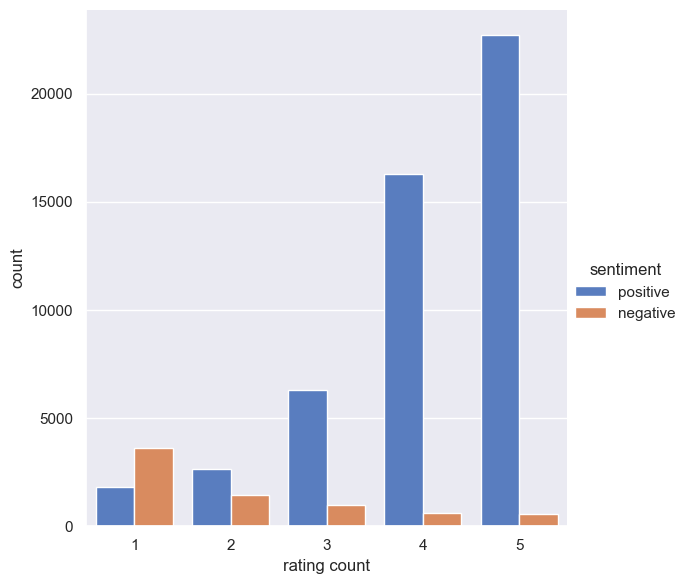

In [21]:
star_senti_plot = sns.catplot(x="stars", hue="sentiment", data=review_data,
                height=6, kind="count", palette="muted")
star_senti_plot.set_xlabels('rating count')

### Word count Statistics

In [7]:
# preprocessing text data
def dataprocess(df):
    df['text'] = df['text'].apply(str)


In [8]:
def freq_word(x, terms):
    words = ' '.join([text for text in x])
    words = words.split()
    
    freq_dist = FreqDist(words)
    words_df = pd.DataFrame({'words':list(freq_dist.keys()), 'counts':list(freq_dist.values())})
    
    d = words_df.nlargest(columns = "counts", n = terms)
    plt.figure()
    ax = sns.barplot(data = d, x = "counts", y = "words")
    ax.set(ylabel = "word")
    

In [9]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# remove stopwords
def remove_stopwords(data):
    review = data.apply(lambda x: ' '.join([y for y in x.split() if len(y)>2]))
    review_new = review.apply(lambda x: ' '.join([y for y in x.split() if y not in stop_words]))
    review_new = review_new.apply(str.lower)
    return review_new
                              

In [10]:
text_rvstop = remove_stopwords(review_data['text'])

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

def lemmatization(text, pos):
    output = []
    for word in text:
        doc = nlp(" ".join(word))
        output.append([token.lemma_ for token in doc if token.pos_ in pos])
    return output

In [22]:
def out(data,pos):
    review = remove_stopwords(data)
    tokenized_review = pd.Series(data).apply(lambda x : x.split())
    data = lemmatization(tokenized_review,pos)
    for i in range(len(data)):
        data[i] = ' '.join(data[i])
    freq_word(data,20)
    return review

0        looks like second red kings restaurant chinato...
1        absolutely wonderful food service! lunch/dinne...
2        the new han dynasty took spot old mid-atlantic...
3        awesome food, great place split bunch deliciou...
4        i've coming place years now, even though live ...
                               ...                        
56942    spice great happy hour option heart center cit...
56943    friend dragging out, think would spent whole t...
56944    so, person decided try something new center ci...
56945    incredible amazing. always come philly. get fi...
56946    excited food saw, unfortunately place closes e...
Name: text, Length: 56947, dtype: object

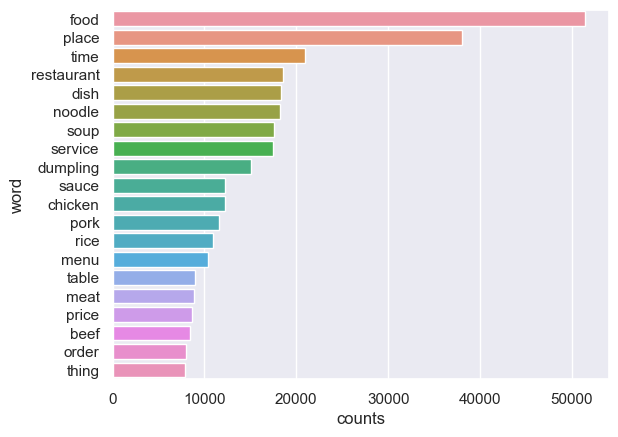

In [23]:
out(review_data['text'],["NOUN"])

0        looks like second red kings restaurant chinato...
1        absolutely wonderful food service! lunch/dinne...
2        the new han dynasty took spot old mid-atlantic...
3        awesome food, great place split bunch deliciou...
4        i've coming place years now, even though live ...
                               ...                        
56942    spice great happy hour option heart center cit...
56943    friend dragging out, think would spent whole t...
56944    so, person decided try something new center ci...
56945    incredible amazing. always come philly. get fi...
56946    excited food saw, unfortunately place closes e...
Name: text, Length: 56947, dtype: object

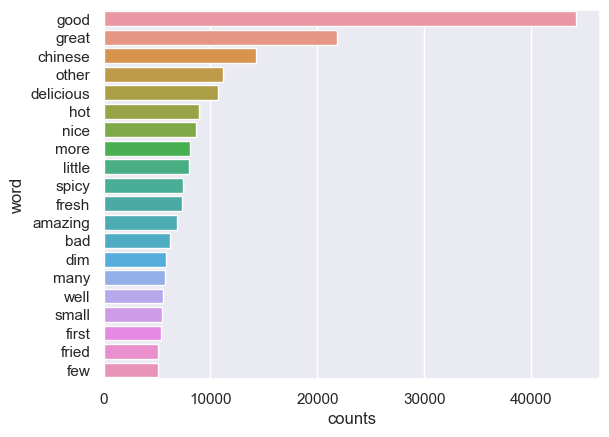

In [24]:
out(review_data['text'],['ADJ'])

In [ ]:
out(review_data['text'][review_data['sentiment']=='positive'],["NOUN"])

In [ ]:
out(review_data['text'][review_data['sentiment']=='positive'],['ADJ'])